In [23]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline         #Inline IDE(for graph in anaconda notebook)

UsageError: unrecognized arguments: #Inline IDE(for graph in anaconda notebook)


In [24]:
#Importing dataset and extracting independent and dependent variables
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values     # Take values of every row except the last column
y = companies.iloc[:,4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

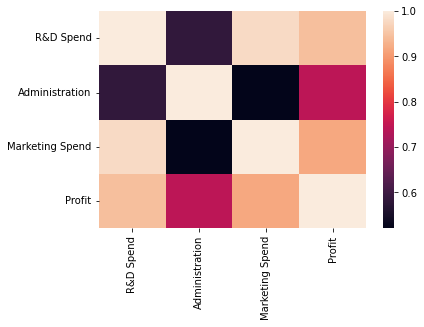

In [25]:
#data visualization
#building the correlation matrix

sns.heatmap(companies.corr())

In [27]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


label = LabelEncoder()
X[:, 3] = label.fit_transform(X[:, 3])

# on older version categorical_features used to be avilable but not anymore
# create a ColumnTransformer object
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [3])  # apply one-hot encoding to column 3
    ], remainder='passthrough'
)
# apply the ColumnTransformer to your data
X = ct.fit_transform(X)
print(X)

  (0, 996)	1.0
  (0, 999)	1.0
  (0, 1000)	136897.8
  (0, 1001)	471784.1
  (1, 995)	1.0
  (1, 997)	1.0
  (1, 1000)	151377.59
  (1, 1001)	443898.53
  (2, 947)	1.0
  (2, 998)	1.0
  (2, 1000)	101145.55
  (2, 1001)	407934.54
  (3, 896)	1.0
  (3, 999)	1.0
  (3, 1000)	118671.85
  (3, 1001)	383199.62
  (4, 882)	1.0
  (4, 998)	1.0
  (4, 1000)	91391.77
  (4, 1001)	366168.42
  (5, 802)	1.0
  (5, 999)	1.0
  (5, 1000)	99814.71
  (5, 1001)	362861.36
  (6, 822)	1.0
  :	:
  (993, 1001)	159075.908
  (994, 591)	1.0
  (994, 999)	1.0
  (994, 1000)	124813.3635
  (994, 1001)	256344.0701
  (995, 331)	1.0
  (995, 997)	1.0
  (995, 1000)	118451.999
  (995, 1001)	173232.6695
  (996, 826)	1.0
  (996, 997)	1.0
  (996, 1000)	130390.08
  (996, 1001)	329204.0228
  (997, 601)	1.0
  (997, 997)	1.0
  (997, 1000)	241926.31
  (997, 1001)	227142.82
  (998, 775)	1.0
  (998, 997)	1.0
  (998, 1000)	321652.14
  (998, 1001)	281692.32
  (999, 994)	1.0
  (999, 999)	1.0
  (999, 1000)	270939.86
  (999, 1001)	295442.17


In [38]:
# avoiding the Dumpy Variable Trap
X = X[:,1:]          # This removes that one extra column that we added while doing our OneHotEncoding

In [40]:
#Splitting Data into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# Fitting Multiple Linear Regression model to Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([121129.47246129, 118719.17008155,  93270.05767702, 132981.74193098,
       156981.89158556,  93334.93017003, 157871.68061515, 143724.00344562,
        87630.24896207,  93058.24505312, 162821.98019306, 158560.71639033,
       105578.63842838, 115468.51046857,  93501.41021885, 155371.02132978,
       123307.92277397, 102730.69222857, 126682.07461924, 113135.44511188,
        85953.86566029, 131540.47810858,  69309.43717584,  80968.06196824,
       162658.81776937, 159612.74520946, 169801.8276259 , 130771.2461673 ,
       121216.82005118, 164945.12840697, 149361.65853763, 110712.35508805,
       160742.9336858 , 145997.66747714,  69330.54029116,  98034.22025437,
        82296.63486114,  84679.86348285, 113802.00582517, 162572.06057003,
        64905.92282817,  90836.16636066, 120506.34888208, 136751.24054047,
       161078.42977745, 144097.2742578 , 146400.83019761, 133712.39354114,
       136601.17399516,  75434.21809708, 121210.89953594,  66884.9250149 ,
       166017.14645644, 1

In [43]:
#Calculating the coefficients
print(regressor.coef_)

[ 2.92601054e+04  0.00000000e+00 -1.26702011e+04 -9.69035472e+04
 -1.26436277e+04 -5.37451468e+03 -3.14873293e+03 -3.14793210e+03
 -1.25730807e+04 -5.30571499e+03  0.00000000e+00 -1.25673291e+04
 -3.11961137e+03 -1.25376979e+04 -3.08939774e+03 -3.07039593e+03
 -1.25023881e+04 -1.24905210e+04 -5.22046160e+03 -3.03530444e+03
 -3.02198132e+03  0.00000000e+00 -3.00064977e+03 -1.24093447e+04
  0.00000000e+00 -1.23907797e+04 -5.11758968e+03 -2.92245837e+03
 -5.06844703e+03  0.00000000e+00 -5.05607037e+03  0.00000000e+00
  0.00000000e+00 -1.22598054e+04  0.00000000e+00 -1.22547819e+04
 -4.98057272e+03 -4.97169063e+03 -1.22346881e+04 -1.22009070e+04
 -1.21993782e+04 -1.21883120e+04 -1.21831429e+04 -2.71030776e+03
 -1.21159449e+04  0.00000000e+00 -2.65497678e+03 -1.21016025e+04
 -2.64951649e+03 -1.20883522e+04  0.00000000e+00  0.00000000e+00
 -2.62469036e+03 -1.20616331e+04 -4.77839624e+03 -4.77177108e+03
  0.00000000e+00 -2.55232327e+03 -2.53637921e+03 -2.53266621e+03
 -1.19468214e+04 -4.67588

In [44]:
#Calculatinf the intercept
print(regressor.intercept_)

22954.947851867182


In [45]:
#calculating R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8706439049022723